# Project : Data Science Job Salaries

Column Description :

- work_year         : The year the salary was paid
- experience_level  : The experience level in the job during the year with the following possible values: (EN) Entry-level , Junior (MI) Mid-level / Intermediate, (SE) Senior-level / Expert, (EX) Executive-level / Director
- employment_type   : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title         : The role worked in during the year
- salary            : The total gross salary amount paid
- salary_currency   : The currency of the salary paid as an ISO 4217 currency code
- salary inusd      : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio      : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) 
- company_location  : The country of the employer's main office or contracting branch as an ISO 3166 country code
- company_size      : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

# **1. IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Melakukan import libarary yang dibutuhkan untuk proses analisis

# **2. DATA LOADING**

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Meload dataset yang dimiliki

## Delete Colum

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns=['salary','salary_currency'],inplace=True)
df.rename(columns={'salary_in_usd' : 'salary'}, inplace=True)

- Kolom "Unnamed : 0" tidak memberikan informasi yang penting untuk analisis, sehingga saya memutuskan untuk melakukan drop terhadap kolom tersebut
- Saya memutuhkan untuk melakukan drop terhadap kolom "salary" dan "salary_current" dan memilih untuk menggunakan kolom salary_in_usd
- Merubah nama kolom "salary_in_usd menjadi "salary"

## Check Missing Value

In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Data yang dimiliki telah bersih dari anya missing value

## Check Data Duplicate

In [5]:
df.columns.duplicated().sum()

0

Tidak ada data duplicate

# **3. Exploratory Data Analysis (EDA)**

# **3.1 Univariate Analysis**

In [6]:
# Plot Configuration
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

# Help Function

def multi_plot(df=df, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind='pie', autopct='%1.1f%%', ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel= xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=2, fontname='Helvetica, Ariel',
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

def single_plot(df=df, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1,1,figsize=(20,7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel='')
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname='Helvetica, Ariel')
    plt.title(label=f'{xlabel} Distribution', size=18)
    plt.show()

def numerical_plot(df=df, x=None, xlabel=None):
    fig, ax = plt.subplots(1, 2, figsize=(20,7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxenplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[1].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel('')
    ax[1].set_ylabel('')
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()

Membuat sebuah fungsi untuk mempermudah pembuatan grafik untuk di analisis

In [7]:
# for interpretability in graphs

df['experience_level'].replace(["MI","SE","EN","EX"],['Mid','Senior','Junior','Expert'], inplace=True)
df['remote_ratio'].replace([0, 50, 100],['On-site','Hybrid','Remote'], inplace=True)
df['employment_type'].replace(['FT','CT','PT','FL'],['Full-time','Contract','Part-time','Freelance'], inplace=True)
df['company_size'].replace(['L','S','M'],['Large','Small','Medium'], inplace=True)

Melakukan perubahan elemen column untuk mempermudah proses analisis

## Work Year

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


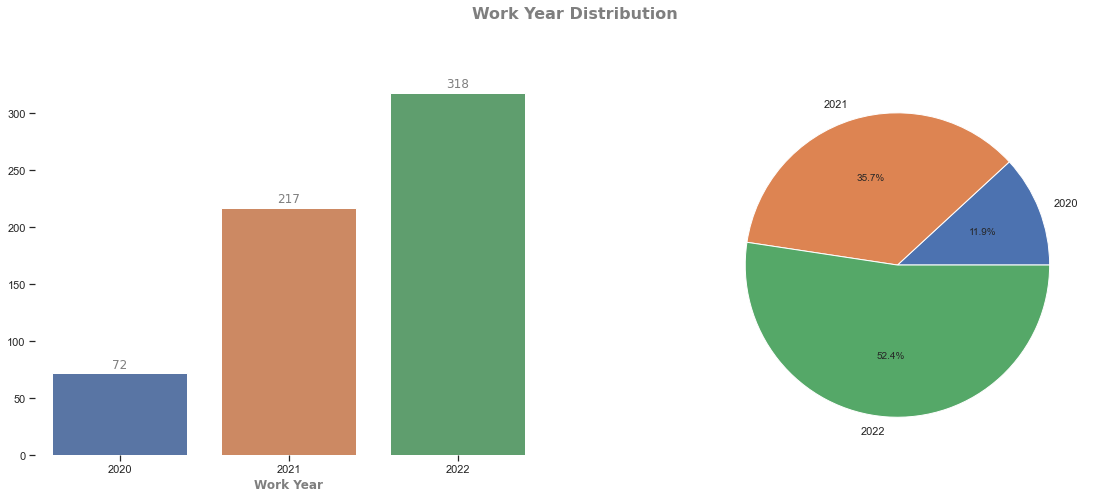

In [8]:
multi_plot(x="work_year", xlabel="Work Year")

- Hampir 1/3 peningkatan terjadi pada tahun 2021
- **Kesimpulan** : Jumlah pekerjaan data science mengalami peningkatan setiap tahunnya

## Experience Level

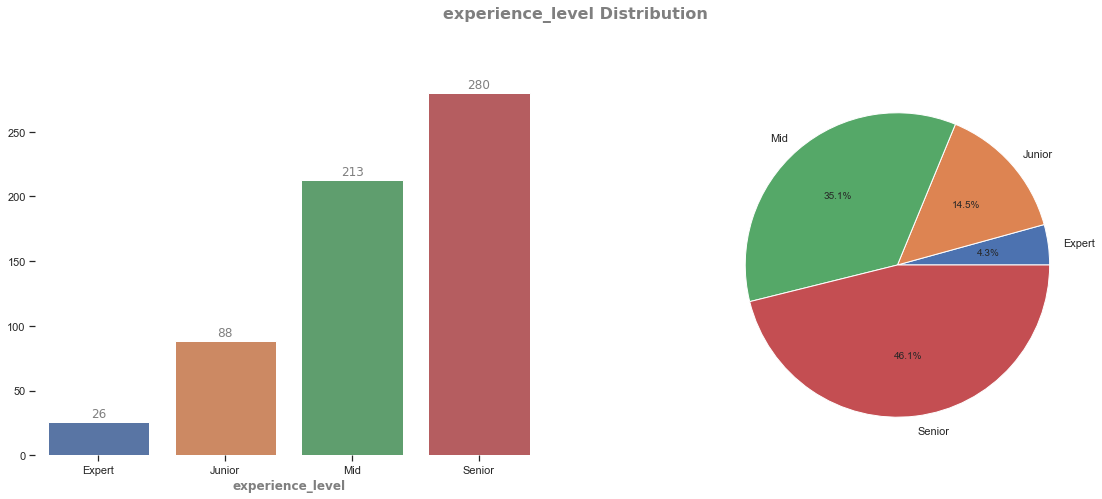

In [9]:
multi_plot(x='experience_level', xlabel='experience_level')

- Jumlah data science tingkat Midle cukup dekat dengan tingkat senior
- Jumlah data science junior tidak mencapai setengah dari data science midle
- Jumlah data science dengan tingkat Senior sangat banyak, namun cukup sedikit yang dapat dikategorikan expert

## Eployment Type

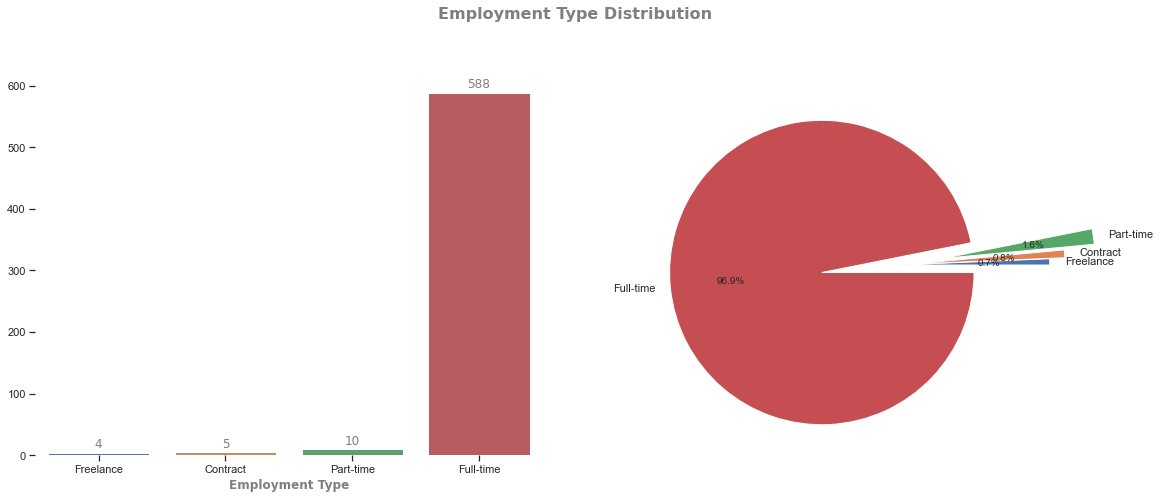

In [10]:
multi_plot(x="employment_type", xlabel="Employment Type", explode=(0,0.1,0.3,0.5))

- Seorang data science paling banyak bekerja sebagai full time
- Sorang data science yang bekera part-time sangat sedikti
- Jumlah karyawan contract dan freelance hampir mendekati nol
- **Kesimpulan** : Hampir semua pekerjaan data science mengharuskan bekerja full-time

## Job Title

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


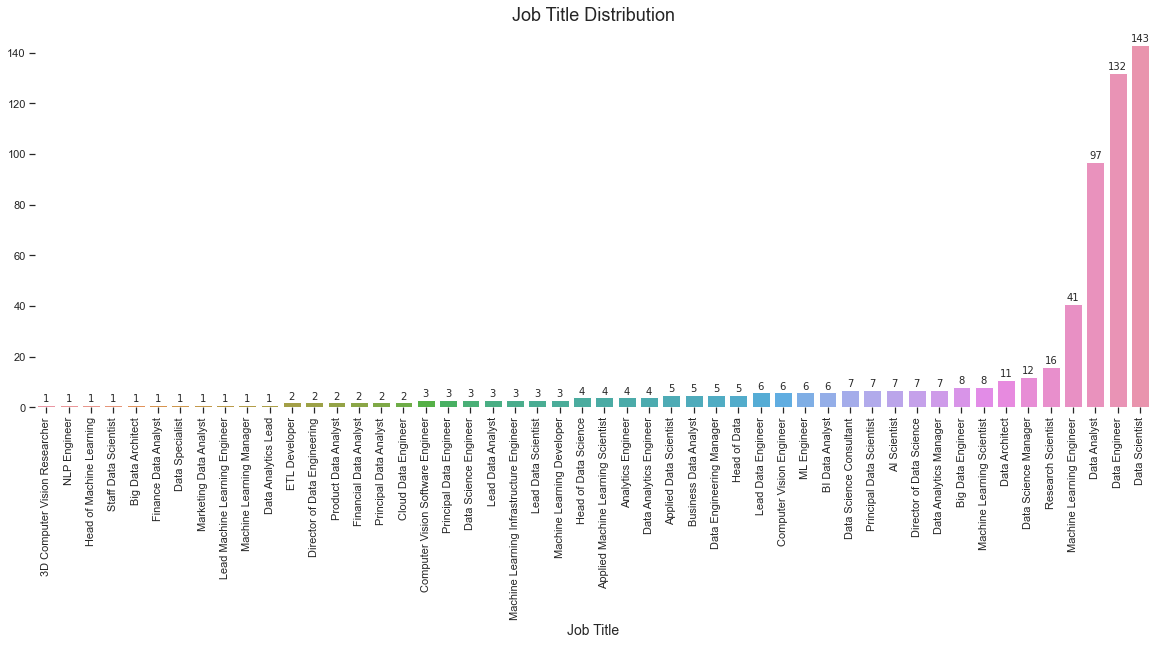

In [11]:
single_plot(x='job_title', xlabel='Job Title', rotation=90, bar_label=True)

- Jumlah pekerjaan data science dan data engineer adalah yang tertinggi dalam dataset
- Analis data menempati posisi ketiga
- **Kesimpulan** : Pasar kerja didominasi oleh Data Scientist, Data Engineer, Machine Learning Engineer

## Salary

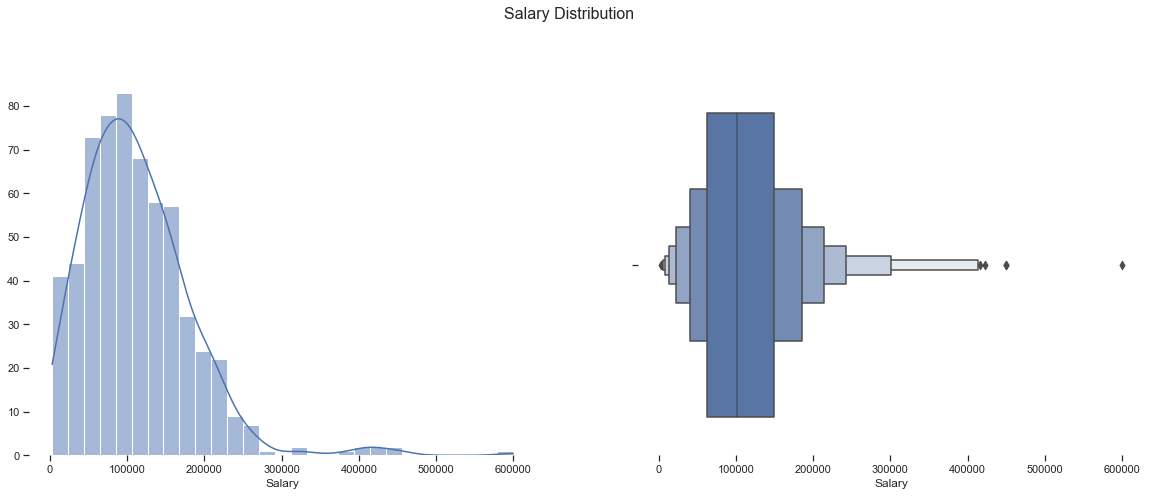

In [12]:
numerical_plot(x='salary', xlabel='Salary')

- Sebagian besar karyawan dibayar sebesar 100000 USD
- Gaji diatas 300000 cukup langka ditemukan
- **Kesimpulan** : Jika kita mendapatkan pekerjaan sebagai data science, kemungkinan kita akan dibayar sekitar 100000 USD

## Employee Residence

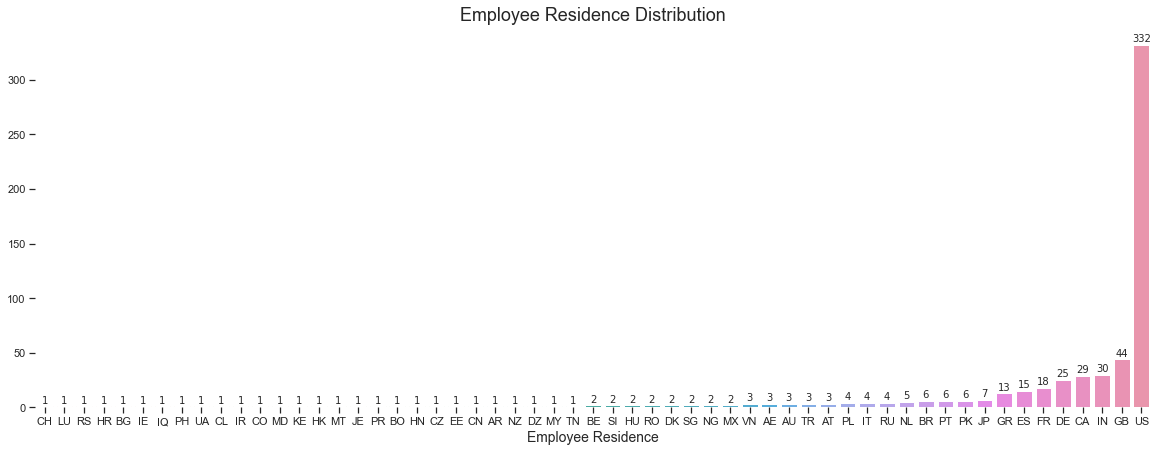

In [13]:
single_plot(x='employee_residence', xlabel='Employee Residence', bar_label=True)

- Amerika Serikat mendominasi persaingan dengan lebih daro 300 entri data
- Inggris Raya, Kanada dan Jerman mengikuti Amrika Serikat dengan entri data kurang dari 50
- Sebagian besar negara berada disebelah nol
- **Kesimpulan** : Pekerjaan Data Science jauh lebih populer di Amerikan Serikat daripada negara manapun

## Remote Rotation

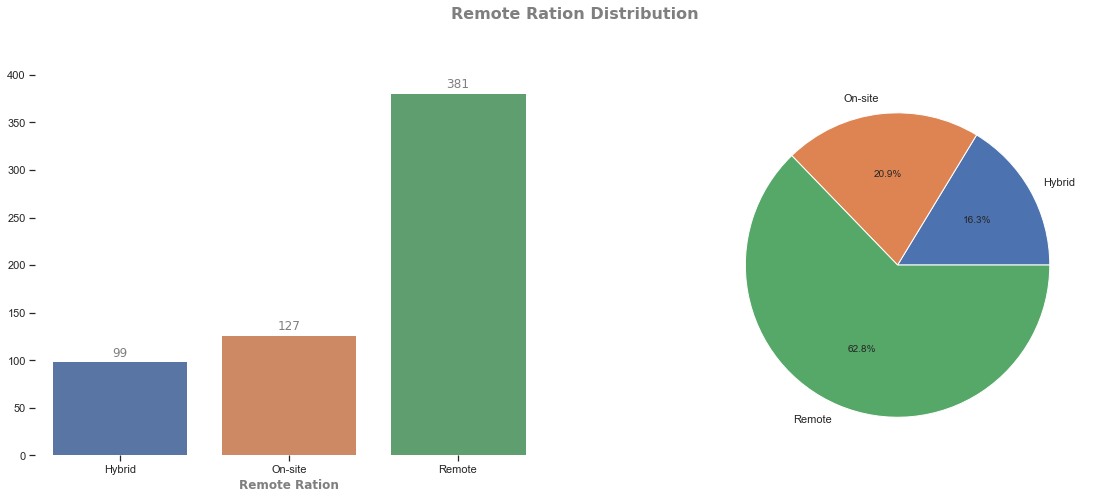

In [14]:
multi_plot(x='remote_ratio', xlabel='Remote Ration')

- Pekerja Remote lebih populer sejauh ini dengan persentase 62.8%
- Pekerja On-site dan Hybrid hampir memiliki popularitas yang sama
- **Dugaan Kesimpulan** : Hasil ini memungkinkan karena kondisi covid-19 sehingga pekerja Remote meningkat dibandingkan perja lainnya. Tentunya hal ini perlu diamati lebih mendalam dengan melibatkan data sebelum pandemi covid-19.

## Company Location

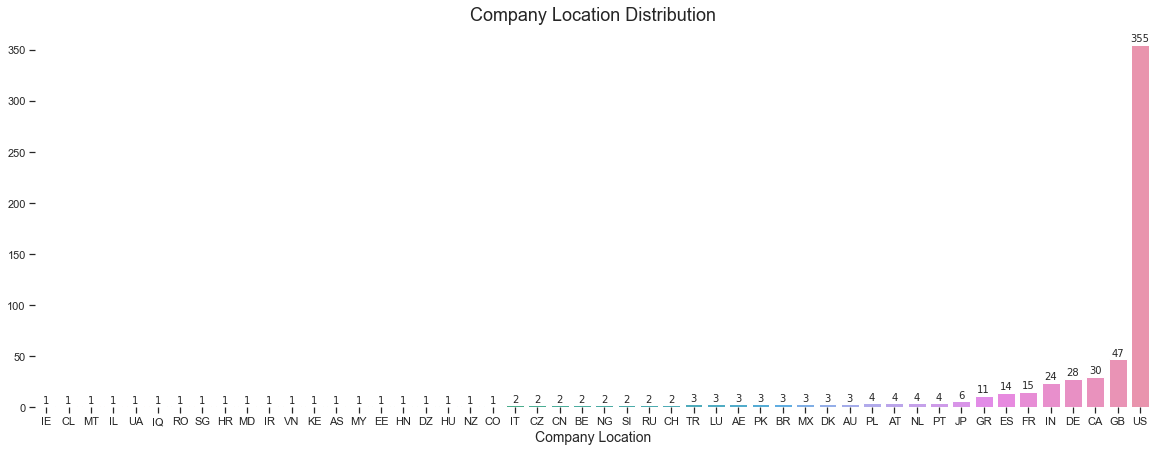

In [15]:
single_plot(x='company_location', xlabel='Company Location', bar_label=True)

- Hasilnya sangat mirip dengan employee residence distribution
- Sejauh ini Amerika Serikat yang paling mendominasi dibandingkan negara lain
- **Kemungkinan Kesimpulan** : Mirip dengan residence distribution, sebagian besar pemberi kerja (perusahaan) berbasis di US

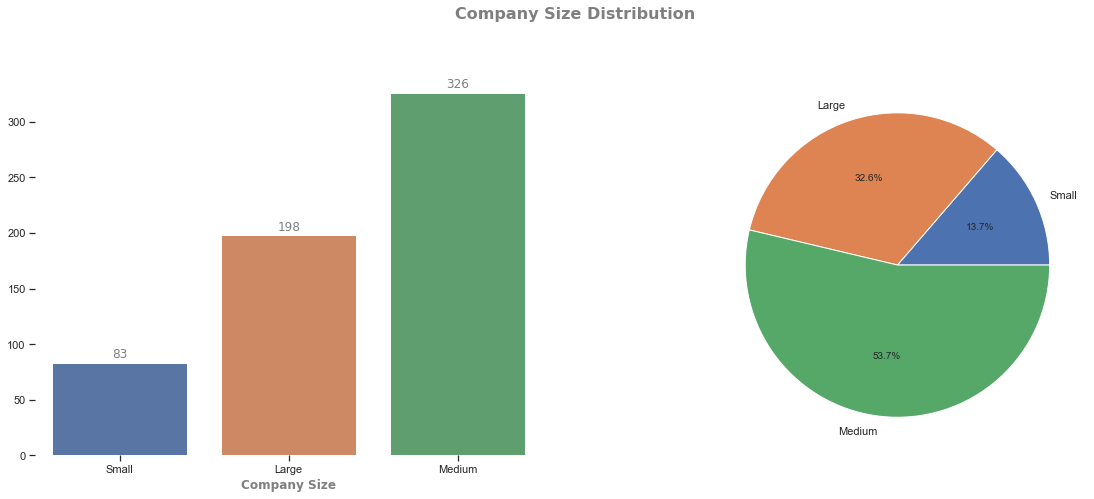

In [16]:
multi_plot(x='company_size', xlabel='Company Size')

- Jumlah perusahaan dengan Medium size mendominasi entri data sebesar 53.7%
- Hampir 1/3 data science bekerja di perusahaan besar
- **Kemungkinan kesimpulan** : Saya berasumsi bahwa, secara umum, jumlah perusahaan dengan ukuran besar lebih sedikit dibandingkan perusahaan dengan ukuran mengah. Sementara itu, perusahaan ukuran kecil kemungkinan tidak membutuhkan seorang data science.


# **3.2 Bivariate Analysis**

In [17]:
## Helper Function

def bivariate_plot(df=df, x=None, xlabel=None, hue=None, rotation=None, bar_label=True, legend=False):
    fig, ax= plt.subplots(1, 1, figsize=(20,7))
    df = df.groupby(x).mean()['salary'].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y='salary', hue=hue, ci=None)
    plt.ylabel(ylabel='Salary (in USD)', size=12)
    plt.xlabel(xlabel=xlabel, size=12)
    plt.title(label=f'Salaries by {xlabel}', size=16)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel")
    sns.despine(bottom=True, left=True)
    plt.show()

## Salary by Work Year

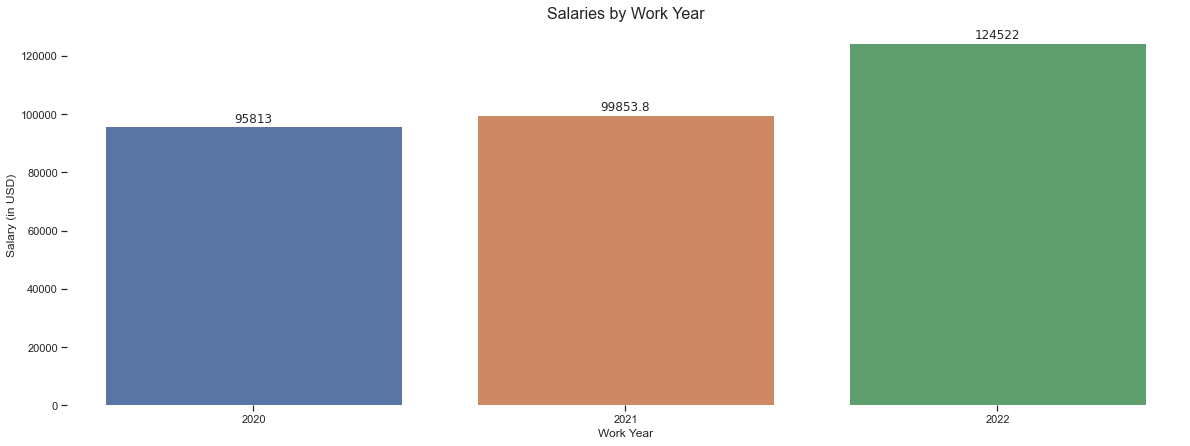

In [18]:
bivariate_plot(x='work_year', xlabel='Work Year')

- Gaji meningkat pada tahun 2021 dan terjadi peningkatan signifikant pada tahun 2022 
- **Kemungkinan Kesimpulan** : Peningkatan gaji disebabkan oleh meningkatnya kebutuhan data science tiap tahunnya


## Salary by Experience Level

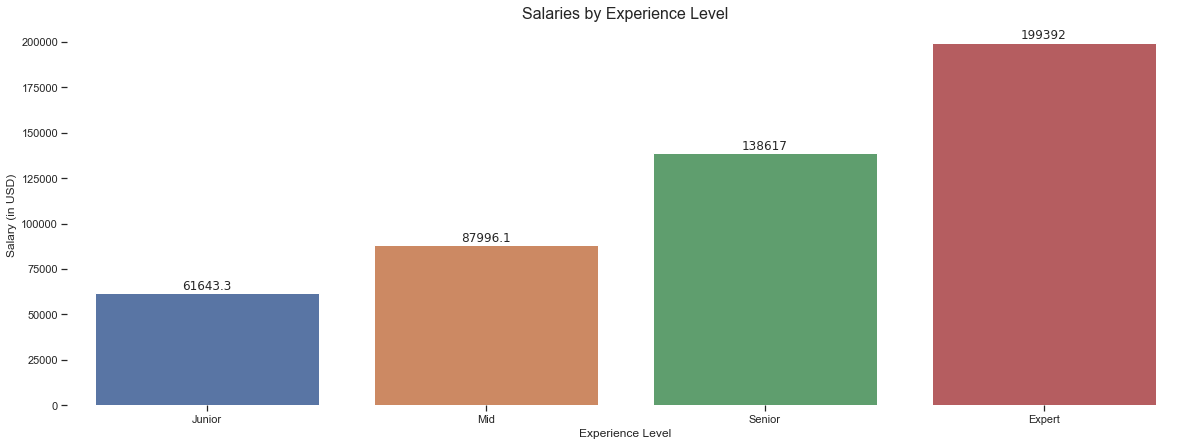

In [19]:
bivariate_plot(x='experience_level', xlabel='Experience Level')

- Pendapatan tertinggi ditempati oleh data science dengan status Expert
- **Kemungkinan Kesimpulan** : Seorang data science dengan status expert sangatlah sedikit yaitu mencapai 4.3%. hal ini yang memungkinkan bahwa pendapatan yang diperoleh reltif besar, serta dari segi skill yang di dalami.

## Salary by Employment Type

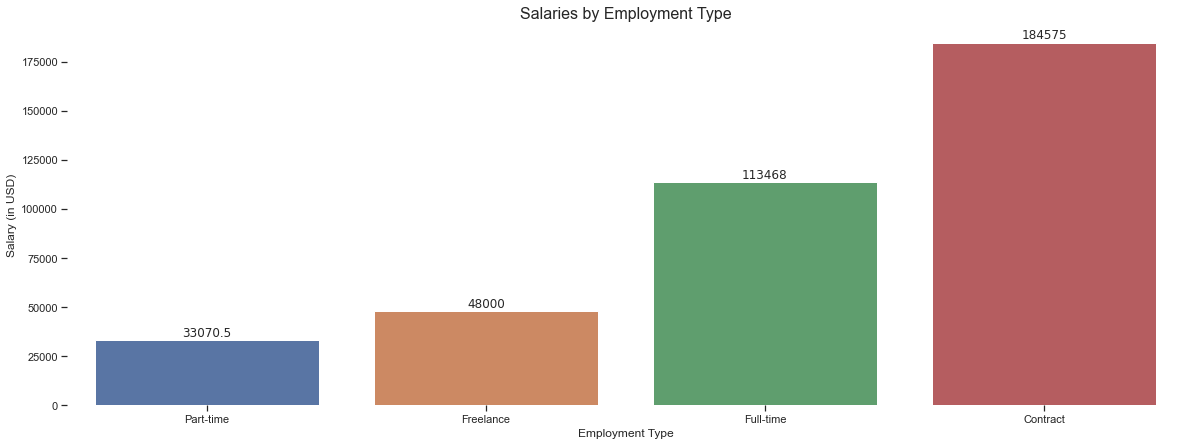

In [20]:
bivariate_plot(x='employment_type', xlabel='Employment Type')

- Pekerja dengan staus kontrak cenderung mendapatkan penghasilan yang besar
- **Kemungkinan kesimpulan** : Terdapat hal yang cukup menarik untuk diamati. Jika dilihat pada sebaran data status pekerja dengan tipe contract sangatlah sdikit hanya mencapai 0.8%, namun ternyata tipe contract memiliki penghasilan yang besar dibandingkan tipe yang lain. Saya menduga banyak perusahaan membutuhkan jasa seorang data science hanya pada jangka waktu yang pendek.

## Salary by Job Title

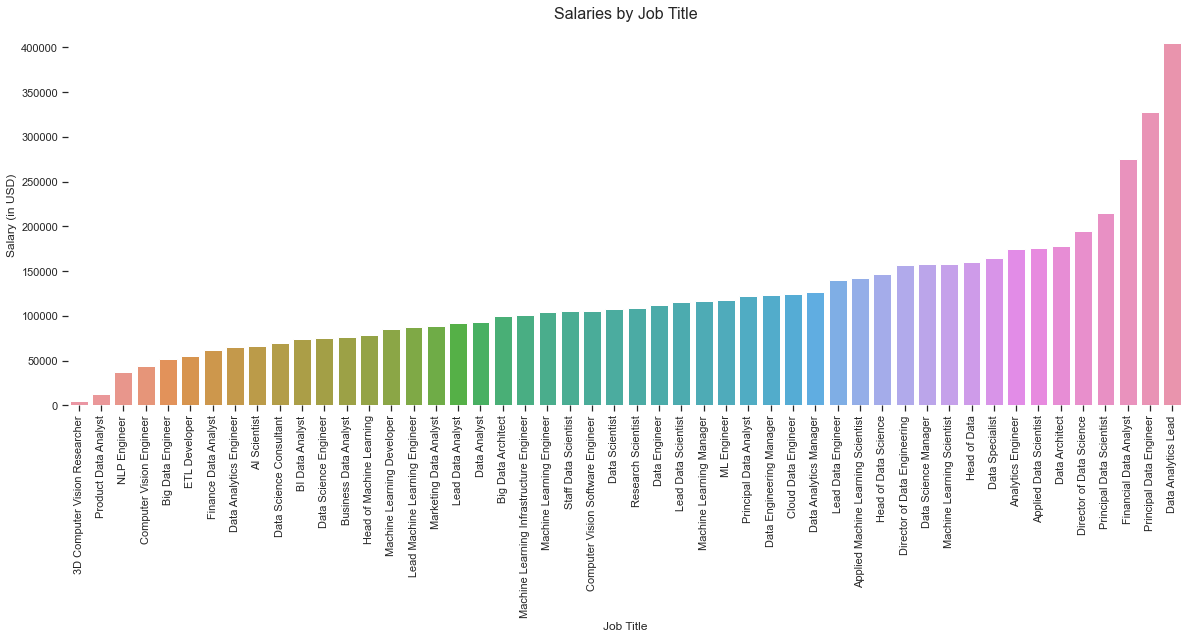

In [21]:
bivariate_plot(x='job_title', xlabel='Job Title', rotation=90, bar_label=False)

- data analytics lead dan pricipal data engineer meurpakan pekerjaan dengan pendapatan tertinggi
- Kecurigaan : Terlihat bahwa Data analytics dan principal data engineer hanya berjumlah 1 orang, hanl ini tentunya perlu analisis lebih karena jika hanya 1 entry dengan 3 juta USD, berarti memiliki rata-rata juga 3 juta USD. Hal ini perlu analisis lebih lanjut.

## Analysis Lanjut Grafik Salaryes by Job Title

In [22]:
print(f"Jumlah pekerja Principal data Engineer : {df[df.job_title=='Principal Data Engineer'].value_counts().sum()}")
print(f"Jumlah pekerja Data Analutics Lead : {df[df.job_title=='Data Analytics Lead'].value_counts().sum()}")

Jumlah pekerja Principal data Engineer : 3
Jumlah pekerja Data Analutics Lead : 1


## Salary by Employee Residence

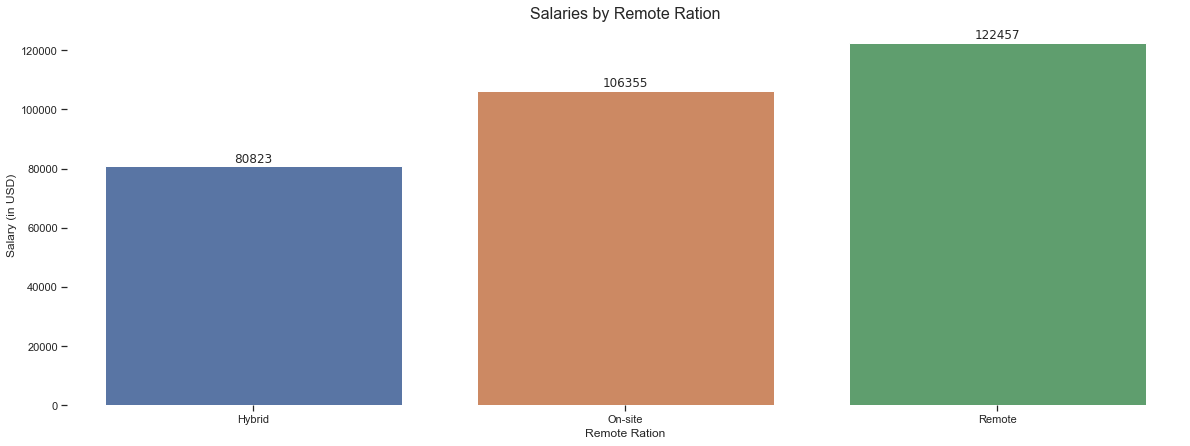

In [23]:
bivariate_plot(x='remote_ratio', xlabel='Remote Ration')

Bekerja secara remote cenderung memiliki pendapatan yang tinggi dibandingkan bekerja secara hybrid ataupun on-site

## Company Location

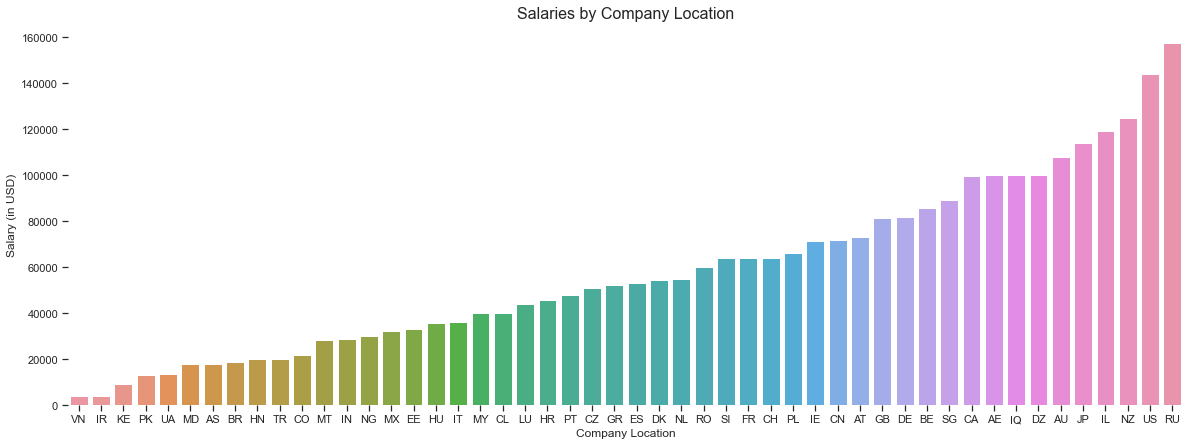

In [24]:
bivariate_plot(x='company_location', xlabel='Company Location', bar_label=False)

## Company Size

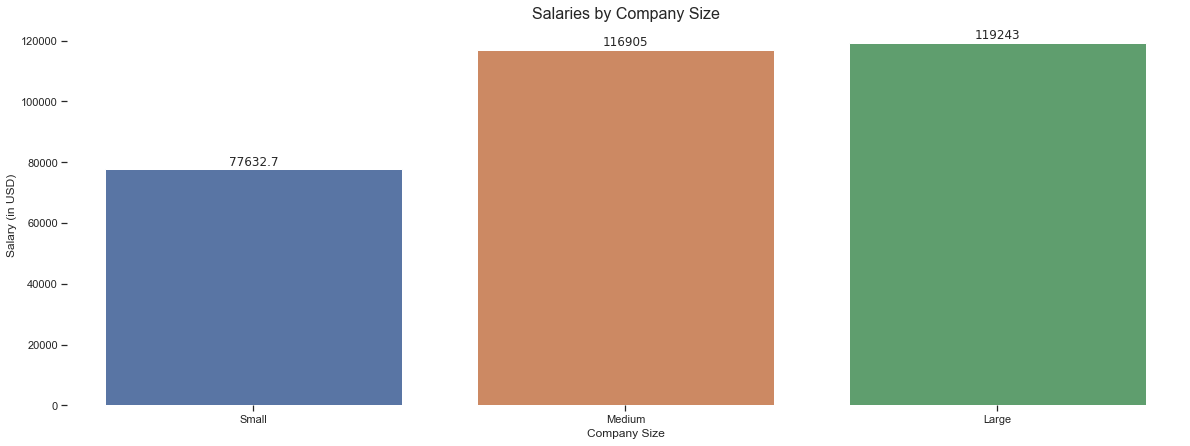

In [25]:
bivariate_plot(x='company_size', xlabel='Company Size')

Pekerja yang bekerja di perudsahaan medium ataupun large cenderung memiliki pendapatan yang sama